In [1]:
# Importar librerias a utilizar

import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Problema 1
Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

In [6]:
# Primero definimos la función para binarizar

def binarizar_imagen(ruta_imagen, threshold = 128):
    
    #Leemos la imagen en escala de grises
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

    #Ahora aplicamos la binarización
    _, imagen_binarizada = cv2.threshold(imagen, threshold, 255, cv2.THRESH_BINARY)
    
    return imagen_binarizada

#Utilizamos nuestra función en una imagen

imagen_binarizada = binarizar_imagen('africa_twin.jpg')
cv2.imwrite('africa_twin_binarizada.jpg', imagen_binarizada)


True

# Problema 2
Desarrolle una función que dada dos que usted desee del mismo tamaño (igual ancho y alto) y a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [11]:
# Primero definimos nuestra función

def operacion_imagen(ruta_imagen1, ruta_imagen2):
    
    #Leemos las imágenes en escala de grises
    imagen1 = cv2.imread(ruta_imagen1, cv2.IMREAD_GRAYSCALE)
    imagen2 = cv2.imread(ruta_imagen2, cv2.IMREAD_GRAYSCALE)

    # Suma
    suma = cv2.add(imagen1, imagen2)

    # Resta
    resta = cv2.subtract(imagen1, imagen2)

    # Binarización para operaciones lógicas
    _, imagen_binarizada1 = cv2.threshold(imagen1, 128, 255, cv2.THRESH_BINARY)
    _, imagen_binarizada2 = cv2.threshold(imagen2, 128, 255, cv2.THRESH_BINARY)

    # AND
    and_imagen = cv2.bitwise_and(imagen_binarizada1, imagen_binarizada2)

    # OR
    or_imagen = cv2.bitwise_or(imagen_binarizada1, imagen_binarizada2)

    # XOR
    xor_imagen = cv2.bitwise_xor(imagen_binarizada1, imagen_binarizada2)

    return suma, resta, and_imagen, or_imagen, xor_imagen

# Utilizamos nuestra función en las imágenes

suma, resta, and_imagen, or_imagen, xor_imagen = operacion_imagen('imagen1.jpg', 'imagen2.jpg')
cv2.imwrite('suma.jpg', suma)
cv2.imwrite('resta.jpg', resta)
cv2.imwrite('and.jpg', and_imagen)
cv2.imwrite('or.jpg', or_imagen)
cv2.imwrite('xor.jpg', xor_imagen)



True

# Problema 3
Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

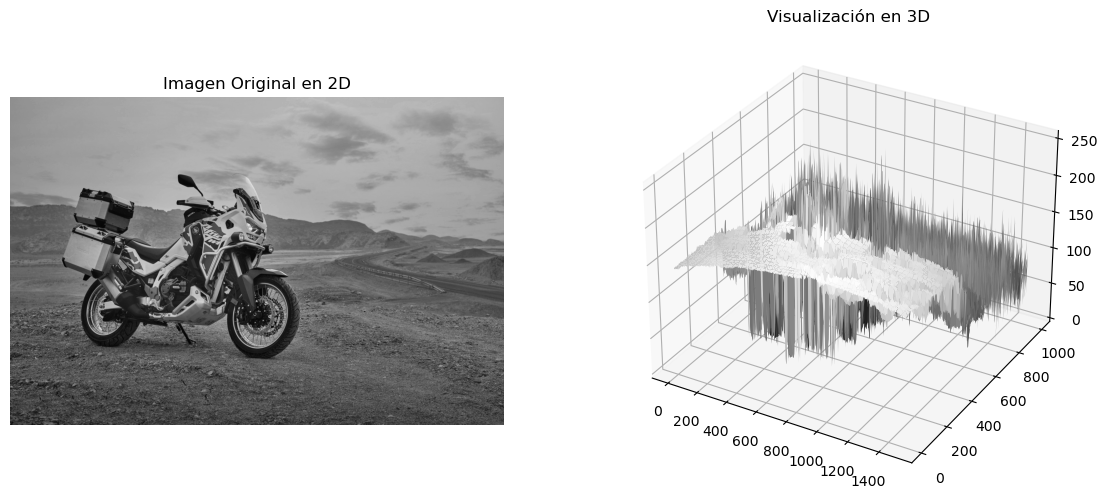

In [13]:
# Primero definimos nuestra función

def imagen_3D(ruta_imagen):

    # Leer la imagen en escala de grises
    image = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    
    # Crear una malla de puntos en el espacio
    x = np.arange(0, image.shape[1], 1)
    y = np.arange(0, image.shape[0], 1)
    x, y = np.meshgrid(x, y)
    
    # Crear la figura
    fig = plt.figure(figsize=(14, 6))

    # Subplot 1: Imagen original en 2D
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Imagen Original en 2D')
    ax1.axis('off')

    # Subplot 2: Imagen en 3D
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(x, y, image, cmap='gray')
    ax2.set_title('Visualización en 3D')
    
    plt.show()

# Ejemplo de uso
imagen_3D('africa_twin.jpg')

# Problema 4

Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

In [15]:
# Definimos nuestras funciones para cada transformacion

def transformacion_negativa(imagen):
    return 255 - imagen

def transformacion_lineal(imagen, alpha, beta):
    return cv2.convertScaleAbs(imagen, alpha=alpha, beta=beta)

def transformacion_logaritmitca(imagen):
    c = 255 / np.log(1 + np.max(imagen))
    return c * (np.log(imagen + 1))

def transformacion_exponencial(imagen, gamma):
    return np.array(255*(imagen/255)**gamma, dtype='uint8')

# Utilizamos las funciones
imagen = cv2.imread('africa_twin.jpg', cv2.IMREAD_GRAYSCALE)

negativa = transformacion_negativa(imagen)
lineal = transformacion_lineal(imagen, alpha=1.2, beta=30)
logaritmica = transformacion_logaritmitca(imagen)
exponencial = transformacion_exponencial(imagen, gamma=2.0)

cv2.imwrite('negativa.jpg', negativa)
cv2.imwrite('lineal.jpg', lineal)
cv2.imwrite('logaritmica.jpg', logaritmica)
cv2.imwrite('exponencial.jpg', exponencial)

C:\Users\julit\AppData\Local\Temp\ipykernel_27680\1898810104.py:11: RuntimeWarning: divide by zero encountered in log
  return c * (np.log(imagen + 1))


True

# Problema 5

Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo de Canny para la detección de bordes.

## Comparación entre el Kernel Laplaciano y el Algoritmo de Canny

### Kernel Laplaciano
El Kernel Laplaciano es un operador matemático utilizado para detectar bordes en una imagen. Se basa en la segunda derivada de la imagen y es sensible a áreas donde hay un cambio rápido en la intensidad de los píxeles.

### Algoritmo de Canny
El Algoritmo de Canny es un método avanzado de detección de bordes que incluye varios pasos, como el suavizado de la imagen, cálculo de gradiente, supresión no-máxima y umbralización con histéresis. Es conocido por su precisión y capacidad de reducir el ruido en la imagen.

### Diferencias Principales
- **Ruido**: El Laplaciano es más sensible al ruido, mientras que Canny reduce el ruido antes de detectar bordes.
- **Detección de Bordes**: Canny es más preciso gracias a la supresión no-máxima y la histéresis.
- **Complejidad**: Canny es más complejo, pero ofrece mejores resultados en la mayoría de los casos.




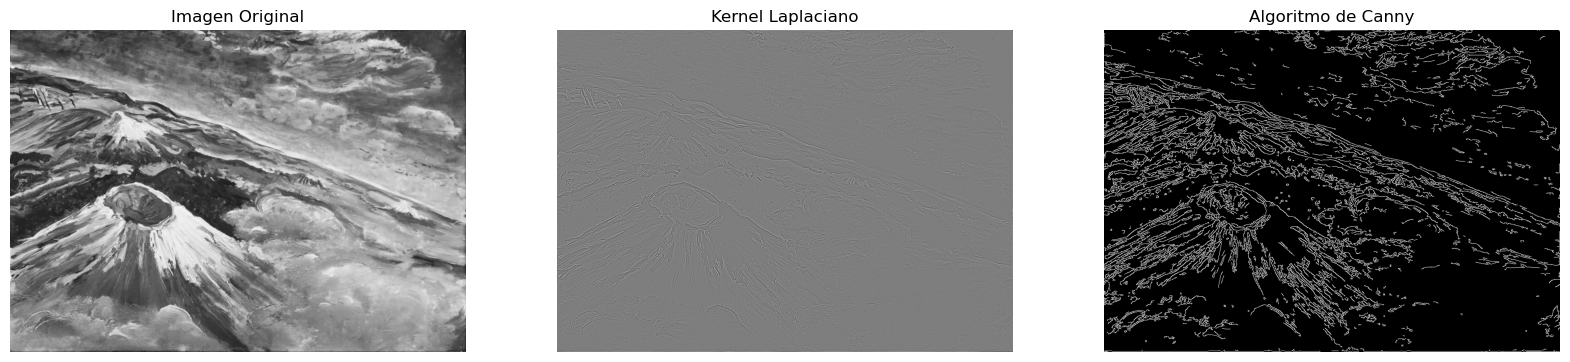

In [20]:
# Leer la imagen en escala de grises
image = cv2.imread('imagen1.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar Kernel Laplaciano
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Aplicar Algoritmo de Canny
canny = cv2.Canny(image, 100, 200)

# Mostrar las imágenes
plt.figure(figsize=(20, 14))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Laplaciano
plt.subplot(1, 3, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Kernel Laplaciano')
plt.axis('off')

# Canny
plt.subplot(1, 3, 3)
plt.imshow(canny, cmap='gray')
plt.title('Algoritmo de Canny')
plt.axis('off')

plt.show()

## Conclusión
El Kernel Laplaciano es un método rápido para la detección de bordes, pero es más susceptible al ruido. Por otro lado, el Algoritmo de Canny, aunque más complejo, proporciona una detección de bordes más precisa y es menos sensible al ruido, lo que lo hace más adecuado para aplicaciones donde la calidad del borde es crucial.